In [ ]:
#################################### This script creates fig. 8 of the article ###############################

In [17]:
# Import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from matplotlib.pyplot import figure
import matplotlib.transforms as mtransforms
from matplotlib.ticker import FormatStrFormatter
import csv
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Import the dataset
pathToFile = 'F:/Redaction/Bernadouze/Submitted/R2/Data_repository/Dataset_with_indices.csv'
rawData = pd.read_csv(pathToFile,sep=',')
UAV_Data = pd.DataFrame(rawData)
UAV_Data.head(40)

,Plot,Season,GEP (gCO2.m².hour-1),ER (gCO2.m².hour-1),NEE (gCO2.m².hour-1),B,G,R,RE,NIR,...,GLI,GNDVI,LCI,NDRE,NDVI,OSAVI,RCC,RVI,SIPI,TVI
0,P1,May,-1.86,1.30,-0.56,0.04,0.09,0.10,0.30,0.43,...,0.125000,0.653846,0.245283,0.178082,0.622642,0.478261,0.434783,4.300000,1.181818,1.059548
1,P3,May,-1.47,1.28,-0.19,0.04,0.09,0.07,0.25,0.40,...,0.241379,0.632653,0.319149,0.230769,0.702128,0.523810,0.350000,5.714286,1.090909,1.096416
2,P4,May,-1.25,0.89,-0.36,0.04,0.10,0.08,0.28,0.42,...,0.250000,0.615385,0.280000,0.200000,0.680000,0.515152,0.363636,5.250000,1.117647,1.086278
3,P5,May,-1.84,1.19,-0.65,0.04,0.07,0.05,0.18,0.34,...,0.217391,0.658537,0.410256,0.307692,0.743590,0.527273,0.312500,6.800000,1.034483,1.115164
4,P6,May,-1.27,0.96,-0.31,0.05,0.10,0.09,0.24,0.37,...,0.176471,0.574468,0.282609,0.213115,0.608696,0.451613,0.375000,4.111111,1.142857,1.052946
5,P7,May,-1.20,0.86,-0.34,0.03,0.06,0.04,0.18,0.32,...,0.263158,0.684211,0.388889,0.280000,0.777778,0.538462,0.307692,8.000000,1.035714,1.130388
6,P8,May,-0.93,0.97,0.04,0.04,0.06,0.07,0.18,0.26,...,0.043478,0.625000,0.242424,0.181818,0.575758,0.387755,0.411765,3.714286,1.157895,1.037187
7,P9,May,-1.12,0.94,-0.18,0.03,0.09,0.07,0.25,0.36,...,0.285714,0.600000,0.255814,0.180328,0.674419,0.491525,0.368421,5.142857,1.137931,1.083706
8,P1,June,-1.46,0.80,-0.66,0.02,0.06,0.05,0.22,0.35,...,0.263158,0.707317,0.325000,0.228070,0.750000,0.535714,0.384615,7.000000,1.100000,1.118034
9,P3,June,-1.23,0.76,-0.47,0.02,0.06,0.04,0.19,0.34,...,0.333333,0.700000,0.394737,0.283019,0.789474,0.555556,0.333333,8.500000,1.066667,1.135550


In [20]:
# Read results from modelling step
results_UAV = pd.DataFrame(pd.read_csv('F:/Redaction/Bernadouze/Submitted/R2/Data_repository/ModelsUAV.csv',sep=','))

# Find best model based on Mean RMSE
results_UAV['R'] = results_UAV['R'].abs()

# NEE
group = results_UAV[results_UAV['VarToPred']=='NEE (gCO2.m².hour-1)']
meanByExpVar = group.groupby(['ExpVar']).mean().reset_index().drop(columns=['SplitId']).rename(columns={"R": "Mean R", "RMSE": "Mean RMSE", "AIC":"Mean AIC"})
stdByExpVar = group.groupby(['ExpVar']).std().reset_index().drop(columns=['SplitId','NbOfExpVar','ExpVar']).rename(columns={"R": "Std R", "RMSE": "Std RMSE", "AIC":"Std AIC"})
UAV_NEE_BestModels = pd.concat([meanByExpVar, stdByExpVar], axis=1, join='inner').sort_values(by='Mean R',ascending=False)

# ER
group = results_UAV[results_UAV['VarToPred']=='ER (gCO2.m².hour-1)']
meanByExpVar = group.groupby(['ExpVar']).mean().reset_index().drop(columns=['SplitId']).rename(columns={"R": "Mean R", "RMSE": "Mean RMSE", "AIC":"Mean AIC"})
stdByExpVar = group.groupby(['ExpVar']).std().reset_index().drop(columns=['SplitId','NbOfExpVar','ExpVar']).rename(columns={"R": "Std R", "RMSE": "Std RMSE", "AIC":"Std AIC"})
UAV_ER_BestModels = pd.concat([meanByExpVar, stdByExpVar], axis=1, join='inner').sort_values(by='Mean R',ascending=False)

# GEP
group = results_UAV[results_UAV['VarToPred']=='GEP (gCO2.m².hour-1)']
meanByExpVar = group.groupby(['ExpVar']).mean().reset_index().drop(columns=['SplitId']).rename(columns={"R": "Mean R", "RMSE": "Mean RMSE", "AIC":"Mean AIC"})
stdByExpVar = group.groupby(['ExpVar']).std().reset_index().drop(columns=['SplitId','NbOfExpVar','ExpVar']).rename(columns={"R": "Std R", "RMSE": "Std RMSE", "AIC":"Std AIC"})
UAV_GEP_BestModels = pd.concat([meanByExpVar, stdByExpVar], axis=1, join='inner').sort_values(by='Mean R',ascending=False)

# NEE
UAV_NEEgroup = results_UAV[results_UAV['VarToPred']=='NEE (gCO2.m².hour-1)']
UAV_NEEmean = UAV_NEEgroup.groupby(['ExpVar']).mean().sort_values(by=['R'],ascending=False)
UAV_NEEstd = UAV_NEEgroup.groupby(['ExpVar']).std().sort_values(by=['R'],ascending=False)
UAV_NEEBestVars = UAV_NEEmean.index[0]
print('UAV Best variable combinaison for NEE: ',UAV_NEEBestVars)
UAV_NEENbVar = UAV_NEEmean.iloc[0,1]
print('N = ',UAV_NEENbVar)
UAV_NEEMeanR = UAV_NEEmean.iloc[0,2]
UAV_NEEStdR = UAV_NEEstd.iloc[0,2]
print('R = %.2f' % UAV_NEEMeanR) #, '± %.0f'% UAV_NEEStdR
UAV_NEEMeanRMSE = UAV_NEEmean.iloc[0,3]
UAV_NEEStdRMSE = UAV_NEEstd.iloc[0,3]
print('RMSE = %.2f' % UAV_NEEMeanRMSE) #,'± %.0f' % UAV_NEEStdRMSE
UAV_NEEMeanAIC = UAV_NEEmean.iloc[0,4]
UAV_NEEStdAIC = UAV_NEEstd.iloc[0,4]
print('AIC = %.0f'% UAV_NEEMeanAIC,'± %.0f ' % UAV_NEEStdAIC)

# ER
UAV_ERgroup = results_UAV[results_UAV['VarToPred']=='ER (gCO2.m².hour-1)']
UAV_ERmean = UAV_ERgroup.groupby(['ExpVar']).mean().sort_values(by=['R'],ascending=False)
UAV_ERstd = UAV_ERgroup.groupby(['ExpVar']).std().sort_values(by=['R'],ascending=False)
UAV_ERBestVars = UAV_ERmean.index[0]
print('UAV Best variable combinaison for ER: ',UAV_ERBestVars)
UAV_ERNbVar = UAV_ERmean.iloc[0,1]
print('N = ',UAV_ERNbVar)
UAV_ERMeanR = UAV_ERmean.iloc[0,2]
UAV_ERStdR = UAV_ERstd.iloc[0,2]
print('R = %.2f' % UAV_ERMeanR) #
UAV_ERMeanRMSE = UAV_ERmean.iloc[0,3]
UAV_ERStdRMSE = UAV_ERstd.iloc[0,3]
print('RMSE = %.2f' % UAV_ERMeanRMSE) #,'± %.0f' % UAV_ERStdRMSE
UAV_ERMeanAIC = UAV_ERmean.iloc[0,4]
UAV_ERStdAIC = UAV_ERstd.iloc[0,4]
print('AIC = %.0f'% UAV_ERMeanAIC,'± %.0f ' % UAV_ERStdAIC)

# GEP
UAV_GEPgroup = results_UAV[results_UAV['VarToPred']=='GEP (gCO2.m².hour-1)']
UAV_GEPmean = UAV_GEPgroup.groupby(['ExpVar']).mean().sort_values(by=['R'],ascending=False)
UAV_GEPstd = UAV_GEPgroup.groupby(['ExpVar']).std().sort_values(by=['R'],ascending=False)
UAV_GEPBestVars = UAV_GEPmean.index[0]
print('UAV Best variable combinaison for GEP: ',UAV_GEPBestVars)
UAV_GEPNbVar = UAV_GEPmean.iloc[0,1]
print('N = ',UAV_GEPNbVar)
UAV_GEPMeanR = UAV_GEPmean.iloc[0,2]
UAV_GEPStdR = UAV_GEPstd.iloc[0,2]
print('R = %.2f' % UAV_GEPMeanR) #, '± %.0f'% UAV_GEPStdR
UAV_GEPMeanRMSE = UAV_GEPmean.iloc[0,3]
UAV_GEPStdRMSE = UAV_GEPstd.iloc[0,3]
print('RMSE = %.2f' % UAV_GEPMeanRMSE) #,'± %.0f' % UAV_GEPStdRMSE
UAV_GEPMeanAIC = UAV_GEPmean.iloc[0,4]
UAV_GEPStdAIC = UAV_GEPstd.iloc[0,4]
print('AIC = %.0f'% UAV_GEPMeanAIC,'± %.0f ' % UAV_GEPStdAIC)

UAV Best variable combinaison for NEE:  ('NDRE', 'TEMP', 'BWDRVI')
N =  3.0
R = 0.59
RMSE = 0.27
AIC = 5 ± 6 
UAV Best variable combinaison for ER:  ('TEMP', 'BWDRVI', 'CVI', 'PAR')
N =  4.0
R = 0.75
RMSE = 0.35
AIC = 16 ± 9 
UAV Best variable combinaison for GEP:  ('NDRE', 'TEMP', 'PAR')
N =  3.0
R = 0.69
RMSE = 0.45
AIC = 27 ± 7 


In [21]:
# Filter and show the 10 best models for feature importance analysis
results_UAV['R'] = results_UAV['R'].abs()

# NEE
FeatureImportance_NEEgroup = results_UAV[results_UAV['VarToPred']=='NEE (gCO2.m².hour-1)']
FeatureImportance_NEEmean = FeatureImportance_NEEgroup.groupby(['ExpVar']).mean().sort_values(by=['R'],ascending=False)
FeatureImportance_NEEBestVars = FeatureImportance_NEEmean.head(10)
FeatureImportance_NEEBestVars = FeatureImportance_NEEBestVars.reset_index()
print('NEE: ', FeatureImportance_NEEBestVars[['ExpVar', 'R', 'RMSE']])

#ER
FeatureImportance_ERgroup = results_UAV[results_UAV['VarToPred']=='ER (gCO2.m².hour-1)']
FeatureImportance_ERmean = FeatureImportance_ERgroup.groupby(['ExpVar']).mean().sort_values(by=['R'],ascending=False)
FeatureImportance_ERBestVars = FeatureImportance_ERmean.head(10)
FeatureImportance_ERBestVars = FeatureImportance_ERBestVars.reset_index()
print('ER: ',FeatureImportance_ERBestVars[['ExpVar', 'R', 'RMSE']])

# GEP
FeatureImportance_GEPgroup = results_UAV[results_UAV['VarToPred']=='GEP (gCO2.m².hour-1)']
FeatureImportance_GEPmean = FeatureImportance_GEPgroup.groupby(['ExpVar']).mean().sort_values(by=['R'],ascending=False)
FeatureImportance_GEPBestVars = FeatureImportance_GEPmean.head(10)
FeatureImportance_GEPBestVars = FeatureImportance_GEPBestVars.reset_index()
print('GEP: ',FeatureImportance_GEPBestVars[['ExpVar', 'R', 'RMSE']])

NEE:                                              ExpVar         R      RMSE
0                       ('NDRE', 'TEMP', 'BWDRVI')  0.594031  0.270898
1                ('NDRE', 'TEMP', 'BWDRVI', 'NIR')  0.564737  0.276173
2                ('NDRE', 'TEMP', 'BWDRVI', 'PAR')  0.556456  0.289368
3                ('NDRE', 'TEMP', 'BWDRVI', 'CVI')  0.552467  0.281231
4         ('NDRE', 'TEMP', 'BWDRVI', 'PAR', 'NIR')  0.542305  0.285483
5         ('NDRE', 'TEMP', 'BWDRVI', 'CVI', 'NIR')  0.537600  0.295635
6         ('NDRE', 'TEMP', 'BWDRVI', 'CVI', 'PAR')  0.524916  0.289056
7                        ('TEMP', 'BWDRVI', 'NIR')  0.522427  0.292670
8  ('NDRE', 'TEMP', 'BWDRVI', 'CVI', 'PAR', 'NIR')  0.519496  0.309499
9                 ('TEMP', 'BWDRVI', 'CVI', 'NIR')  0.495782  0.300863
ER:                                       ExpVar         R      RMSE
0          ('TEMP', 'BWDRVI', 'CVI', 'PAR')  0.749406  0.351625
1                    ('TEMP', 'CVI', 'PAR')  0.736525  0.350603
2               

In [38]:
# Save best model formulas for figure

# UAV
# NEE
UAV_X = UAV_Data[{'NDRE', 'TEMP', 'BWDRVI'}]
UAV_NEE = UAV_Data['NEE (gCO2.m².hour-1)']
UAV_NEE_model = sm.OLS(UAV_NEE,sm.add_constant(UAV_X,has_constant='add')).fit()
UAV_NEE_model_formula = str('NEE = '+'%.1f'%UAV_NEE_model.params[0]
                            +'+('+'%.1f'%UAV_NEE_model.params[1]+'*'+UAV_X.columns[0]
                            +')+('+'%.1f'%UAV_NEE_model.params[2]+'*'+UAV_X.columns[1]
                            +')+('+'%.2f'%UAV_NEE_model.params[3]+'*'+UAV_X.columns[2]
                            +')')
UAV_NEE_model_R = str('r = %.2f' % UAV_NEEMeanR)
UAV_NEE_model_RMSE = str('RMSE = %.2f' % UAV_NEEMeanRMSE)

# ER
UAV_X = UAV_Data[{'TEMP', 'BWDRVI', 'NIR', 'PAR'}]
UAV_ER = UAV_Data['ER (gCO2.m².hour-1)']
UAV_ER_model = sm.OLS(UAV_ER,sm.add_constant(UAV_X,has_constant='add')).fit()
UAV_ER_model_formula = str('ER = '+'%.1f'%UAV_ER_model.params[0]
                           +'+('+'%.1f'%UAV_ER_model.params[1]+'*'+UAV_X.columns[0]
                           +')+('+'%.1f'%UAV_ER_model.params[2]+'*'+UAV_X.columns[1]
                           +')+('+'%.1f'%UAV_ER_model.params[3]+'*'+UAV_X.columns[2]
                           +')+('+'%.2f'%UAV_ER_model.params[4]+'*'+UAV_X.columns[3]
                           +')')
UAV_ER_model_R = str('r = %.2f' % UAV_ERMeanR)
UAV_ER_model_RMSE = str('RMSE = %.2f' % UAV_ERMeanRMSE)

# GEP
UAV_X = UAV_Data[{'NDRE', 'TEMP', 'PAR'}]
UAV_GEP = UAV_Data['GEP (gCO2.m².hour-1)']
UAV_GEP_model = sm.OLS(UAV_GEP,sm.add_constant(UAV_X,has_constant='add')).fit()
UAV_GEP_model_formula  = str('GEP = '+'%.1f'%UAV_GEP_model.params[0]
                             +'+('+'%.1f'%UAV_GEP_model.params[1]+'*'+UAV_X.columns[0]
                             +')+('+'%.1f'%UAV_GEP_model.params[2]+'*'+UAV_X.columns[1]
                             +')+('+'%.2f'%UAV_GEP_model.params[3]+'*'+UAV_X.columns[2]
                             + ')')
UAV_GEP_model_R  = str('r = %.2f' % UAV_GEPMeanR)
UAV_GEP_model_RMSE = str('RMSE = %.2f' % UAV_GEPMeanRMSE)

In [29]:
# Prepare figure for feature importance
# Read the file
FeatureOfImportance = pd.read_csv('F:/Redaction/Bernadouze/Submitted/R2/Data_repository/ModelsUAV_FeatureImportance.csv',sep=',')

# Store results in dataframe
NEE_FeatureImportance = pd.DataFrame()
ER_FeatureImportance = pd.DataFrame()
GEP_FeatureImportance = pd.DataFrame()

# Read and save
BestNEEFeatureOfImportance = FeatureOfImportance[FeatureOfImportance['VarToPred'] == 'NEE (gCO2.m².hour-1)']
NEE_FeatureImportance = NEE_FeatureImportance.append(BestNEEFeatureOfImportance[['NDRE', 'NIR', 'BWDRVI', 'PAR', 'TEMP', 'CVI']].abs())

BestERFeatureOfImportance = FeatureOfImportance[FeatureOfImportance['VarToPred'] == 'ER (gCO2.m².hour-1)']
ER_FeatureImportance = ER_FeatureImportance.append(BestERFeatureOfImportance[['NDRE', 'NIR', 'BWDRVI', 'PAR', 'TEMP', 'CVI']].abs())

BestGEPFeatureOfImportance = FeatureOfImportance[FeatureOfImportance['VarToPred'] == 'GEP (gCO2.m².hour-1)']
GEP_FeatureImportance = GEP_FeatureImportance.append(BestGEPFeatureOfImportance[['NDRE', 'NIR', 'BWDRVI', 'PAR', 'TEMP', 'CVI']].abs())

In [39]:
# Predict using best models
# Add constant to dataset
UAV = sm.add_constant(UAV_Data)
UAV = UAV.drop([32, 33, 34, 35]) # mask outliers in the figure
print('Number of observation points in the dataset : ',UAV.shape[0])
print('Number of columns in the dataset : ',UAV.shape[1])

# NEE
UAV_X = UAV[{'NDRE', 'TEMP', 'BWDRVI'}]
UAV_NEE = UAV['NEE (gCO2.m².hour-1)']
UAV_NEE_model = sm.OLS(UAV_NEE,sm.add_constant(UAV_X,has_constant='add')).fit()
UAV['Modeled NEE'] = UAV_NEE_model.predict()

# ER
UAV_X = UAV[{'TEMP', 'BWDRVI', 'NIR', 'PAR'}]
UAV_ER = UAV['ER (gCO2.m².hour-1)']
UAV_ER_model = sm.OLS(UAV_ER,sm.add_constant(UAV_X,has_constant='add')).fit()
UAV['Modeled ER'] = UAV_ER_model.predict()

# GEP
UAV_X = UAV[{'NDRE', 'TEMP', 'PAR'}]
UAV_GEP = UAV['GEP (gCO2.m².hour-1)']
UAV_GEP_model = sm.OLS(UAV_GEP,sm.add_constant(UAV_X,has_constant='add')).fit()
UAV['Modeled GEP'] = UAV_GEP_model.predict()

Number of observation points in the dataset :  32
Number of columns in the dataset :  33


In [40]:
# Pepare data for figure
# NEE
UAV_NEE_MAY_OBSERVED = UAV.loc[UAV['Season']=='May',"NEE (gCO2.m².hour-1)"]
UAV_NEE_MAY_MODELED = UAV.loc[UAV['Season']=='May',"Modeled NEE"]

UAV_NEE_JUNE_OBSERVED = UAV.loc[UAV['Season']=='June',"NEE (gCO2.m².hour-1)"]
UAV_NEE_JUNE_MODELED = UAV.loc[UAV['Season']=='June',"Modeled NEE"]

UAV_NEE_JULY_OBSERVED = UAV.loc[UAV['Season']=='July',"NEE (gCO2.m².hour-1)"]
UAV_NEE_JULY_MODELED = UAV.loc[UAV['Season']=='July',"Modeled NEE"]

UAV_NEE_OCTOBER_OBSERVED = UAV.loc[UAV['Season']=='October',"NEE (gCO2.m².hour-1)"]
UAV_NEE_OCTOBER_MODELED = UAV.loc[UAV['Season']=='October',"Modeled NEE"]

# ER
UAV_ER_MAY_OBSERVED = UAV.loc[UAV['Season']=='May',"ER (gCO2.m².hour-1)"]
UAV_ER_MAY_MODELED = UAV.loc[UAV['Season']=='May',"Modeled ER"]

UAV_ER_JUNE_OBSERVED = UAV.loc[UAV['Season']=='June',"ER (gCO2.m².hour-1)"]
UAV_ER_JUNE_MODELED = UAV.loc[UAV['Season']=='June',"Modeled ER"]

UAV_ER_JULY_OBSERVED = UAV.loc[UAV['Season']=='July',"ER (gCO2.m².hour-1)"]
UAV_ER_JULY_MODELED = UAV.loc[UAV['Season']=='July',"Modeled ER"]

UAV_ER_OCTOBER_OBSERVED = UAV.loc[UAV['Season']=='October',"ER (gCO2.m².hour-1)"]
UAV_ER_OCTOBER_MODELED = UAV.loc[UAV['Season']=='October',"Modeled ER"]

# GEP
UAV_GEP_MAY_OBSERVED = UAV.loc[UAV['Season']=='May',"GEP (gCO2.m².hour-1)"]
UAV_GEP_MAY_MODELED = UAV.loc[UAV['Season']=='May',"Modeled GEP"]

UAV_GEP_JUNE_OBSERVED = UAV.loc[UAV['Season']=='June',"GEP (gCO2.m².hour-1)"]
UAV_GEP_JUNE_MODELED = UAV.loc[UAV['Season']=='June',"Modeled GEP"]

UAV_GEP_JULY_OBSERVED = UAV.loc[UAV['Season']=='July',"GEP (gCO2.m².hour-1)"]
UAV_GEP_JULY_MODELED = UAV.loc[UAV['Season']=='July',"Modeled GEP"]

UAV_GEP_OCTOBER_OBSERVED = UAV.loc[UAV['Season']=='October',"GEP (gCO2.m².hour-1)"]
UAV_GEP_OCTOBER_MODELED = UAV.loc[UAV['Season']=='October',"Modeled GEP"]

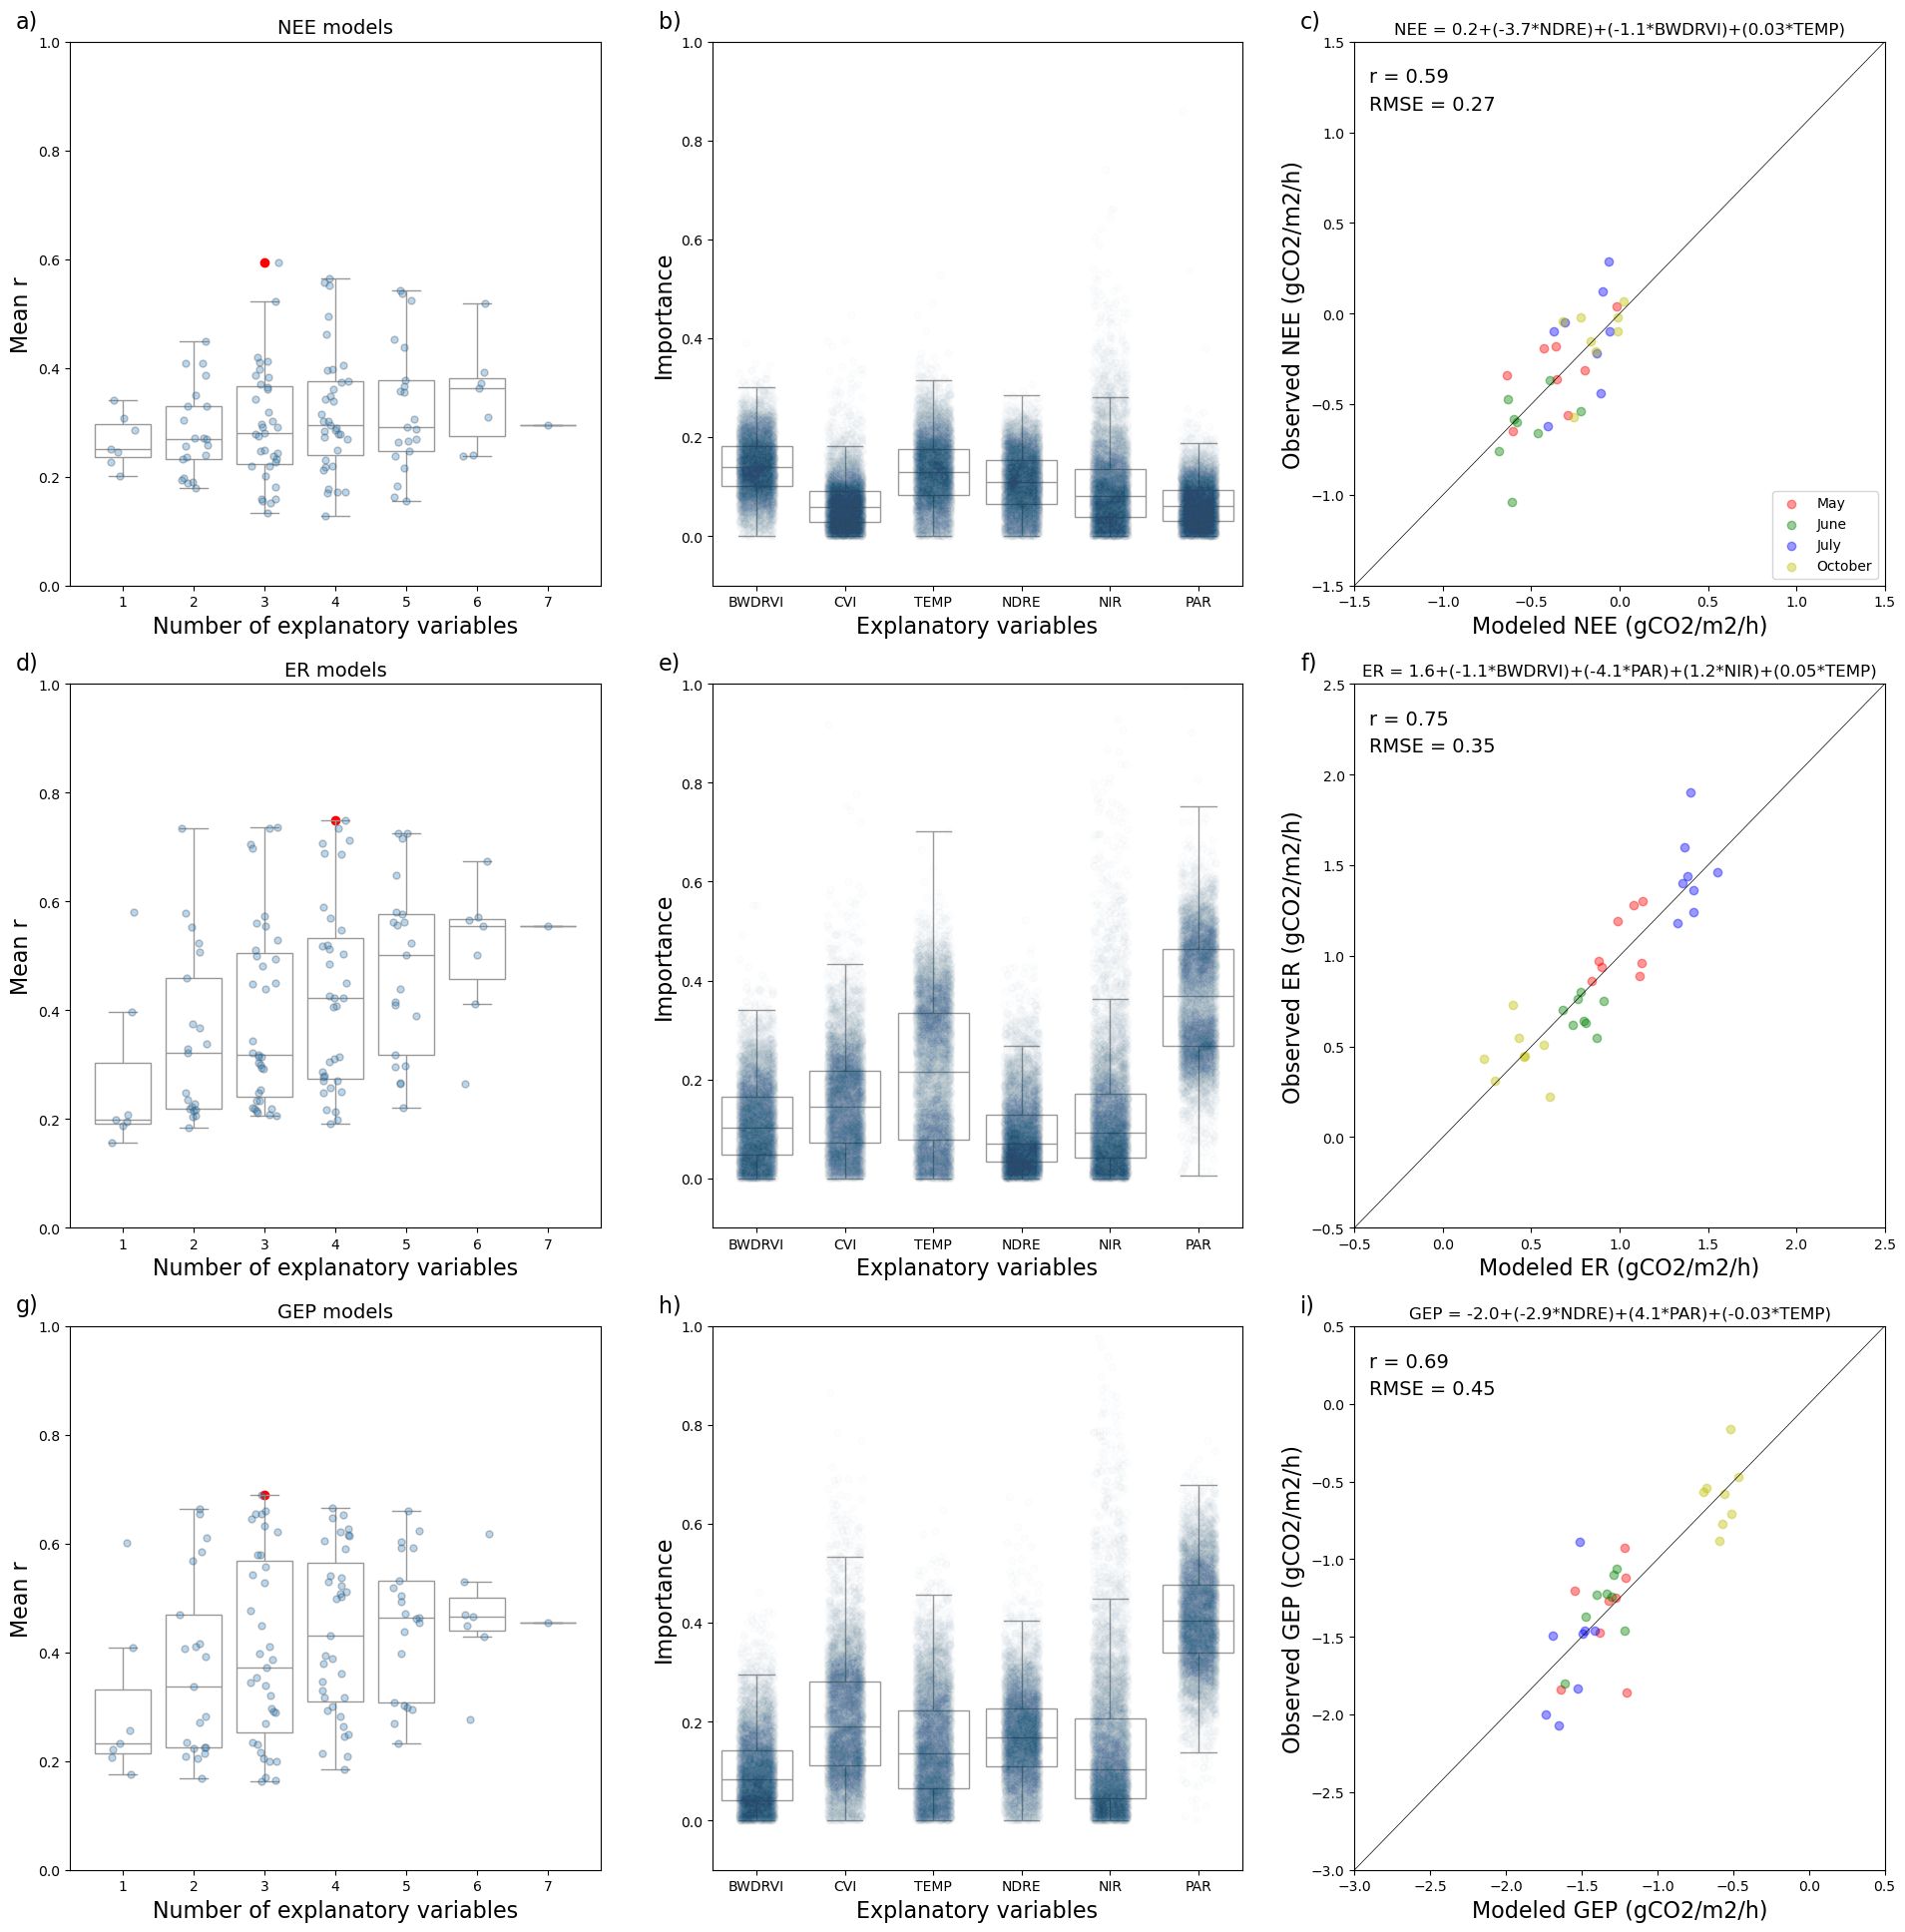

In [46]:
# Display the figure
fig, ((ax1, ax2, ax7), (ax3, ax4, ax8), (ax5, ax6, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
fig.tight_layout(pad=5)

ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax1.text(-0.05, 1.0, 'a)', transform=ax1.transAxes + trans, fontsize = 16, va='bottom')
df = UAV_NEE_BestModels[['NbOfExpVar','Mean R']]
sns.stripplot(x='NbOfExpVar', y='Mean R', data=df, jitter=0.2, alpha=1/3, linewidth=1, color = '#2986cc', ax = ax1)
sns.boxplot(x='NbOfExpVar', y='Mean R',data=df,linewidth=1,color='white',showfliers=False, ax= ax1)
ax1.set_xticks([0, 1, 2, 3, 4, 5, 6], ['1', '2', '3', '4', '5', '6', '7'])
ax1.scatter(2, UAV_NEEMeanR, c='r')
ax1.set_ylabel("Mean r",fontsize = 16)
ax1.set_ylim([0, 1])
ax1.set_xlabel("Number of explanatory variables",fontsize = 16)
ax1.set_title('NEE models',fontsize = 14)

df = NEE_FeatureImportance.stack().reset_index(level=-1,drop=False).rename(columns={'level_1': 'Feature', 0: 'Importance'}) # this drops NaNs
sns.stripplot(x='Feature', y='Importance', data=df, jitter=0.2, alpha=0.01, linewidth=1, color = '#2986cc', ax = ax2)
sns.boxplot(x='Feature', y='Importance',data=df,color='white',showfliers=False, ax= ax2)
ax2.set_ylim([-0.1, 1])
ax2.set_xlabel("Explanatory variables", fontweight='normal', fontsize=16)
ax2.set_ylabel("Importance", fontweight='normal', fontsize=16)
ax2.text(-0.05, 1.0, 'b)', transform=ax2.transAxes + trans, fontsize = 16, va='bottom')
#ax2.set_title('Variable importance in the top 10 NEE models',fontsize = 14)

ax7.scatter(UAV_NEE_MAY_MODELED, UAV_NEE_MAY_OBSERVED, label='May', color='r', alpha=0.4)
ax7.scatter(UAV_NEE_JUNE_MODELED, UAV_NEE_JUNE_OBSERVED, label='June',color='g', alpha=0.4)
ax7.scatter(UAV_NEE_JULY_MODELED, UAV_NEE_JULY_OBSERVED, label='July',color='b', alpha=0.4)
ax7.scatter(UAV_NEE_OCTOBER_MODELED, UAV_NEE_OCTOBER_OBSERVED, label='October',color='y', alpha=0.4)
ax7.set_ylim([-1.5, 1.5])
ax7.set_xlim([-1.5, 1.5])
ax7.set_ylabel("Observed NEE (gCO2/m2/h)", fontweight='normal', fontsize=16)
ax7.set_xlabel("Modeled NEE (gCO2/m2/h)", fontweight='normal', fontsize=16)
ax7.text(-0.05, 1.0, 'c)', transform=ax7.transAxes + trans, fontsize = 16, va='bottom')
ax7.axline((0, 0), (1, 1), linewidth=0.5, color='k')
ax7.legend(loc='lower right')
ax7.text(0.08, 0.90, UAV_NEE_model_R, transform=ax7.transAxes + trans, fontsize = 14, va='bottom')
ax7.text(0.08, 0.85, UAV_NEE_model_RMSE, transform=ax7.transAxes + trans, fontsize = 14, va='bottom')
ax7.set_title(UAV_NEE_model_formula,fontsize = 12)

ax3.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax3.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax3.text(-0.05, 1.0, 'd)', transform=ax3.transAxes + trans, fontsize = 16, va='bottom')
df = UAV_ER_BestModels[['NbOfExpVar','Mean R']]
sns.stripplot(x='NbOfExpVar', y='Mean R', data=df, jitter=0.2, alpha=1/3, linewidth=1, color = '#2986cc', ax = ax3)
sns.boxplot(x='NbOfExpVar', y='Mean R',data=df,linewidth=1,color='white',showfliers=False, ax= ax3)
ax3.scatter(3, UAV_ERMeanR, c='r')
ax3.set_xticks([0, 1, 2, 3, 4, 5, 6], ['1', '2', '3', '4', '5', '6', '7'])
ax3.set_ylabel("Mean r",fontsize = 16)
ax3.set_ylim([0, 1])
ax3.set_xlabel("Number of explanatory variables",fontsize = 16)
ax3.set_title('ER models',fontsize = 14)

df = ER_FeatureImportance.stack().reset_index(level=-1,drop=False).rename(columns={'level_1': 'Feature', 0: 'Importance'}) # this drops NaNs
sns.stripplot(x='Feature', y='Importance', data=df, jitter=0.2, alpha=0.01, linewidth=1, color = '#2986cc', ax = ax4)
sns.boxplot(x='Feature', y='Importance',data=df,color='white',showfliers=False, ax= ax4)
ax4.set_ylim([-0.1, 1])
ax4.set_ylabel("Importance", fontweight='normal', fontsize=16)
ax4.set_xlabel("Explanatory variables", fontweight='normal', fontsize=16)
ax4.text(-0.05, 1.0, 'e)', transform=ax4.transAxes + trans, fontsize = 16, va='bottom')
#ax4.set_title('Variable importance in the top 10 ER models',fontsize = 14)

ax8.scatter(UAV_ER_MAY_MODELED, UAV_ER_MAY_OBSERVED, label='May', color='r', alpha=0.4)
ax8.scatter(UAV_ER_JUNE_MODELED, UAV_ER_JUNE_OBSERVED, label='June',color='g', alpha=0.4)
ax8.scatter(UAV_ER_JULY_MODELED, UAV_ER_JULY_OBSERVED, label='July',color='b', alpha=0.4)
ax8.scatter(UAV_ER_OCTOBER_MODELED, UAV_ER_OCTOBER_OBSERVED, label='October',color='y', alpha=0.4)
ax8.set_ylim([-0.5, 2.5])
ax8.set_xlim([-0.5, 2.5])
ax8.set_ylabel("Observed ER (gCO2/m2/h)", fontweight='normal', fontsize=16)
ax8.set_xlabel("Modeled ER (gCO2/m2/h)", fontweight='normal', fontsize=16)
ax8.text(-0.05, 1.0, 'f)', transform=ax8.transAxes + trans, fontsize = 16, va='bottom')
ax8.axline((0, 0), (1, 1), linewidth=0.5, color='k')
ax8.text(0.08, 0.90, UAV_ER_model_R, transform=ax8.transAxes + trans, fontsize = 14, va='bottom')
ax8.text(0.08, 0.85, UAV_ER_model_RMSE, transform=ax8.transAxes + trans, fontsize = 14, va='bottom')
ax8.set_title(UAV_ER_model_formula,fontsize = 12)

ax5.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax5.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax5.text(-0.05, 1.0, 'g)', transform=ax5.transAxes + trans, fontsize = 16, va='bottom')
df = UAV_GEP_BestModels[['NbOfExpVar','Mean R']]
sns.stripplot(x='NbOfExpVar', y='Mean R', data=df, jitter=0.2, alpha=1/3, linewidth=1, color = '#2986cc', ax = ax5)
sns.boxplot(x='NbOfExpVar', y='Mean R',data=df,linewidth=1,color='white',showfliers=False, ax= ax5)
ax5.scatter(2, UAV_GEPMeanR, c='r')
ax5.set_xticks([0, 1, 2, 3, 4, 5, 6], ['1', '2', '3', '4', '5', '6', '7'])
ax5.set_ylabel("Mean r",fontsize = 16)
ax5.set_ylim([0, 1])
ax5.set_xlabel("Number of explanatory variables",fontsize = 16)
ax5.set_title('GEP models',fontsize = 14)

df = GEP_FeatureImportance.stack().reset_index(level=-1,drop=False).rename(columns={'level_1': 'Feature', 0: 'Importance'}) # this drops NaNs
sns.stripplot(x='Feature', y='Importance', data=df, jitter=0.2, alpha=0.01, linewidth=1, color = '#2986cc', ax = ax6)
sns.boxplot(x='Feature', y='Importance',data=df,color='white',showfliers=False, ax= ax6)
ax6.set_ylim([-0.1, 1])
ax6.set_ylabel("Importance", fontweight='normal', fontsize=16)
ax6.text(-0.05, 1.0, 'h)', transform=ax6.transAxes + trans, fontsize = 16, va='bottom')
ax6.set_xlabel("Explanatory variables", fontweight='normal', fontsize=16)
#ax6.set_title('Variable importance in the top 10 GEP models',fontsize = 14)

ax9.scatter(UAV_GEP_MAY_MODELED, UAV_GEP_MAY_OBSERVED, label='May', color='r', alpha=0.4)
ax9.scatter(UAV_GEP_JUNE_MODELED, UAV_GEP_JUNE_OBSERVED, label='June',color='g', alpha=0.4)
ax9.scatter(UAV_GEP_JULY_MODELED, UAV_GEP_JULY_OBSERVED, label='July',color='b', alpha=0.4)
ax9.scatter(UAV_GEP_OCTOBER_MODELED, UAV_GEP_OCTOBER_OBSERVED, label='October',color='y', alpha=0.4)
ax9.set_ylim([-3, 0.5])
ax9.set_xlim([-3, 0.5])
ax9.set_ylabel("Observed GEP (gCO2/m2/h)", fontweight='normal', fontsize=16)
ax9.set_xlabel("Modeled GEP (gCO2/m2/h)", fontweight='normal', fontsize=16)
ax9.text(-0.05, 1.0, 'i)', transform=ax9.transAxes + trans, fontsize = 16, va='bottom')
ax9.axline((0, 0), (1, 1), linewidth=0.5, color='k')
ax9.text(0.08, 0.90, UAV_GEP_model_R, transform=ax9.transAxes + trans, fontsize = 14, va='bottom')
ax9.text(0.08, 0.85, UAV_GEP_model_RMSE, transform=ax9.transAxes + trans, fontsize = 14, va='bottom')
ax9.set_title(UAV_GEP_model_formula,fontsize = 12)

plt.savefig("F:/Redaction/Bernadouze/Submitted/R2/Figure8.tif", dpi = 600)  
plt.show()